# FE illustrations

In [4]:
import numpy as np 
import pandas as pd
import scipy.linalg as la

# plotting tools 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set() # alias of set_theme() [only available in newer versions]
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.size": 16,
    "font.sans-serif": ["Times"]})

In [5]:
N=3
T=10
sigma_c=10.
sigma_u=1

In [6]:
ii = [i for i in range(N) for t in range(T)]
iii = np.reshape(np.array(ii),(N,T))

In [7]:
def simulate_data(N=N, T=T, sigma_c=sigma_c, sigma_u=sigma_u, K=2, coef_cx=0.0, DOSORT=True): 
    
    beta = np.ones((K,1))
    X = np.hstack([np.ones((N*T,1)), np.random.normal(0,1,(N*T,K-1))])
    u = np.random.normal(0,sigma_u,(N*T,1))
    c = np.random.normal(0,sigma_c,(N,))
    c = c[ii] # from (N,1) to (N*T,1)
    
    # we can sort c to make the plot colors nicer 
    # normally, this is dangerous unless we also sort X in the same way, 
    # but we haven't given any structure to X or u such that this will 
    # matter, so we can get away with it in the name of aesthetics. 
    if DOSORT: 
        c = np.sort(c)
        
    # important: c.ndim==1 at this step, so we must make it into a column 
    # vector. 
    c = c[:,np.newaxis]
    
    # induce correlation between c and x 
    # (only to the first regressor after the constant term)
    X[:,1] += coef_cx*c[:,0]    
    
    # now we can create y 
    y = X@beta + c + u

    return y,X,c,u

In [8]:
def ols(y,X): 
    '''ols: estimate the linear regression model 
    '''
    betahat = np.linalg.inv(X.T@X) @ X.T@y
    return betahat[:,0]

Nice to have for plotting 

In [9]:
def add_reg_line(y,X,ax,k=1): 
    # add reg line along 
    # k: (int) 
    
    # estimate OLS and predict 
    b=ols(y,X)
    yhat = X@b
    
    # sort dots to avoid criss-crossing lines 
    isort = np.argsort(X[:,1])
    ax.plot(X[isort,1], yhat[isort], label='OLS fit')

# FE

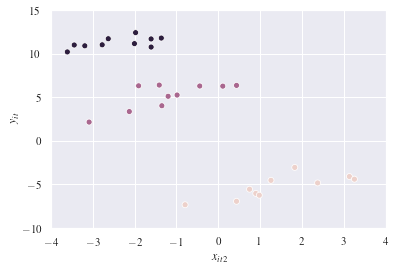

In [11]:
np.random.seed(1)
y,X,c,u = simulate_data(coef_cx=-.2)
ax=sns.scatterplot(y=y.flatten(),x=X[:,1],hue=ii)
ax.get_legend().set_visible(False)
ax.set_xlabel('$x_{it2}$')
ax.set_ylabel('$y_{it}$')
ax.set_ylim([-10,15])
ax.set_xlim([-4,4])
#ax.legend()
#ax.legend(['$i=0$','$i=1$','$i=2$','$i=3$'])
#ax.legend([f'$i={i}$' for i in range(1,N+1)])
#ax.legend([f'$i={i+1}$' for i in range(N)])
plt.savefig('fe_raw.pdf',dpi=300,bbox_inches='tight')
plt.show()

## Add OLS line

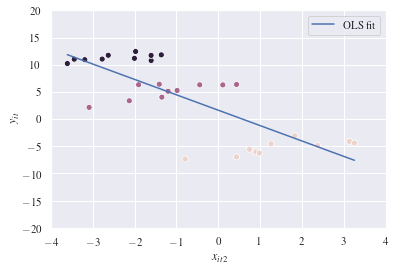

In [9]:
np.random.seed(1)
y,X,c,u = simulate_data(coef_cx=-.2)

ax=sns.scatterplot(y=y.flatten(),x=X[:,1],hue=ii)
ax.set_xlabel('$x_{it2}$'); 
ax.set_ylabel('$y_{it}$')
ax.set_ylim([-10,15])
ax.set_xlim([-4,4])
add_reg_line(y,X,ax)
ax.legend(['OLS fit'])
plt.savefig('fe_fit.pdf',dpi=300,bbox_inches='tight')
plt.show()

## Demean $y$ and $x$

Due to the sorting where the individuals come in blocks, we can just reshape to $(N,T)$ and take the average over the second dimension, `axis=1`. 

In [10]:
# demeaning 
y_time_avg = y.reshape((N,T)).mean(1)
y[:,0] -= y_time_avg[ii]
X_time_avg = X[:,1].reshape((N,T)).mean(1)
X[:, 1] -= X_time_avg[ii]

# For 2022...
# y_time_avg2 = pd.DataFrame({'y': y, 'id': ii}).groupby('id').y.mean().reshape((N,1))
# ydd = (y.reshape((N,T)) - y_time_avg2).reshape((N*T,)) # note: broadcasting inside parentheses

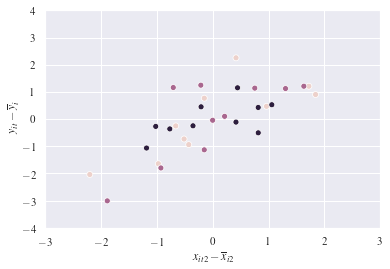

In [14]:
ax=sns.scatterplot(y=y.flatten(),x=X[:,1],hue=ii)
ax.set_xlabel('$x_{it2} - \overline{x}_{i2}$')
ax.set_ylabel('$y_{it} - \overline{y}_{i}$')
ax.get_legend().set_visible(False)
ax.set_xlim([-3,3])
ax.set_ylim([-4,4])

plt.savefig('fe_both_demeaned.pdf',dpi=300,bbox_inches='tight')

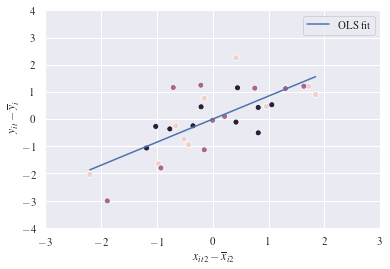

In [15]:
ax=sns.scatterplot(y=y.flatten(),x=X[:,1],hue=ii)
ax.set_xlabel('$x_{it2} - \overline{x}_{i2}$'); 
ax.set_ylabel('$y_{it} - \overline{y}_{i}$')
ax.set_xlim([-3,3])
ax.set_ylim([-4,4])
add_reg_line(y,X,ax)
ax.legend(['OLS fit'])

plt.savefig('fe_both_demeaned_fit.pdf',dpi=300,bbox_inches='tight')